
Raw Combined Dataframe:
      Name     Ground Format       Date  Overs  Maidens  Runs  Wickets  \
0   Bumrah   Adelaide    T20  26-Jan-16    3.3        0    23        3   
1   Bumrah  Melbourne    T20  23-Nov-18    4.0        0    20        1   
2   Bumrah  Melbourne    T20  29-Jan-16    4.0        0    37        2   
3   Bumrah   Adelaide   Test   6-Dec-18   48.0       17   115        6   
4   Bumrah      Perth   Test  14-Dec-18   51.2       18    92        5   
5   Bumrah  Melbourne   Test  26-Dec-18   34.5        7    86        9   
6   Bumrah   Adelaide   Test  17-Dec-20   28.0        8    77        2   
7   Bumrah  Melbourne   Test  26-Dec-20   43.0       10   110        6   
8   Bumrah      Perth   Test  22-Nov-24   30.0        7    72        8   
9   Bumrah  Melbourne   Test  26-Dec-24   53.2       16   156        9   
10  Bumrah   Adelaide   Test   6-Dec-24   24.0        5    63        4   
11   Shami   Adelaide    ODI  15-Jan-19    8.0        0    58        3   
12   Shami  M

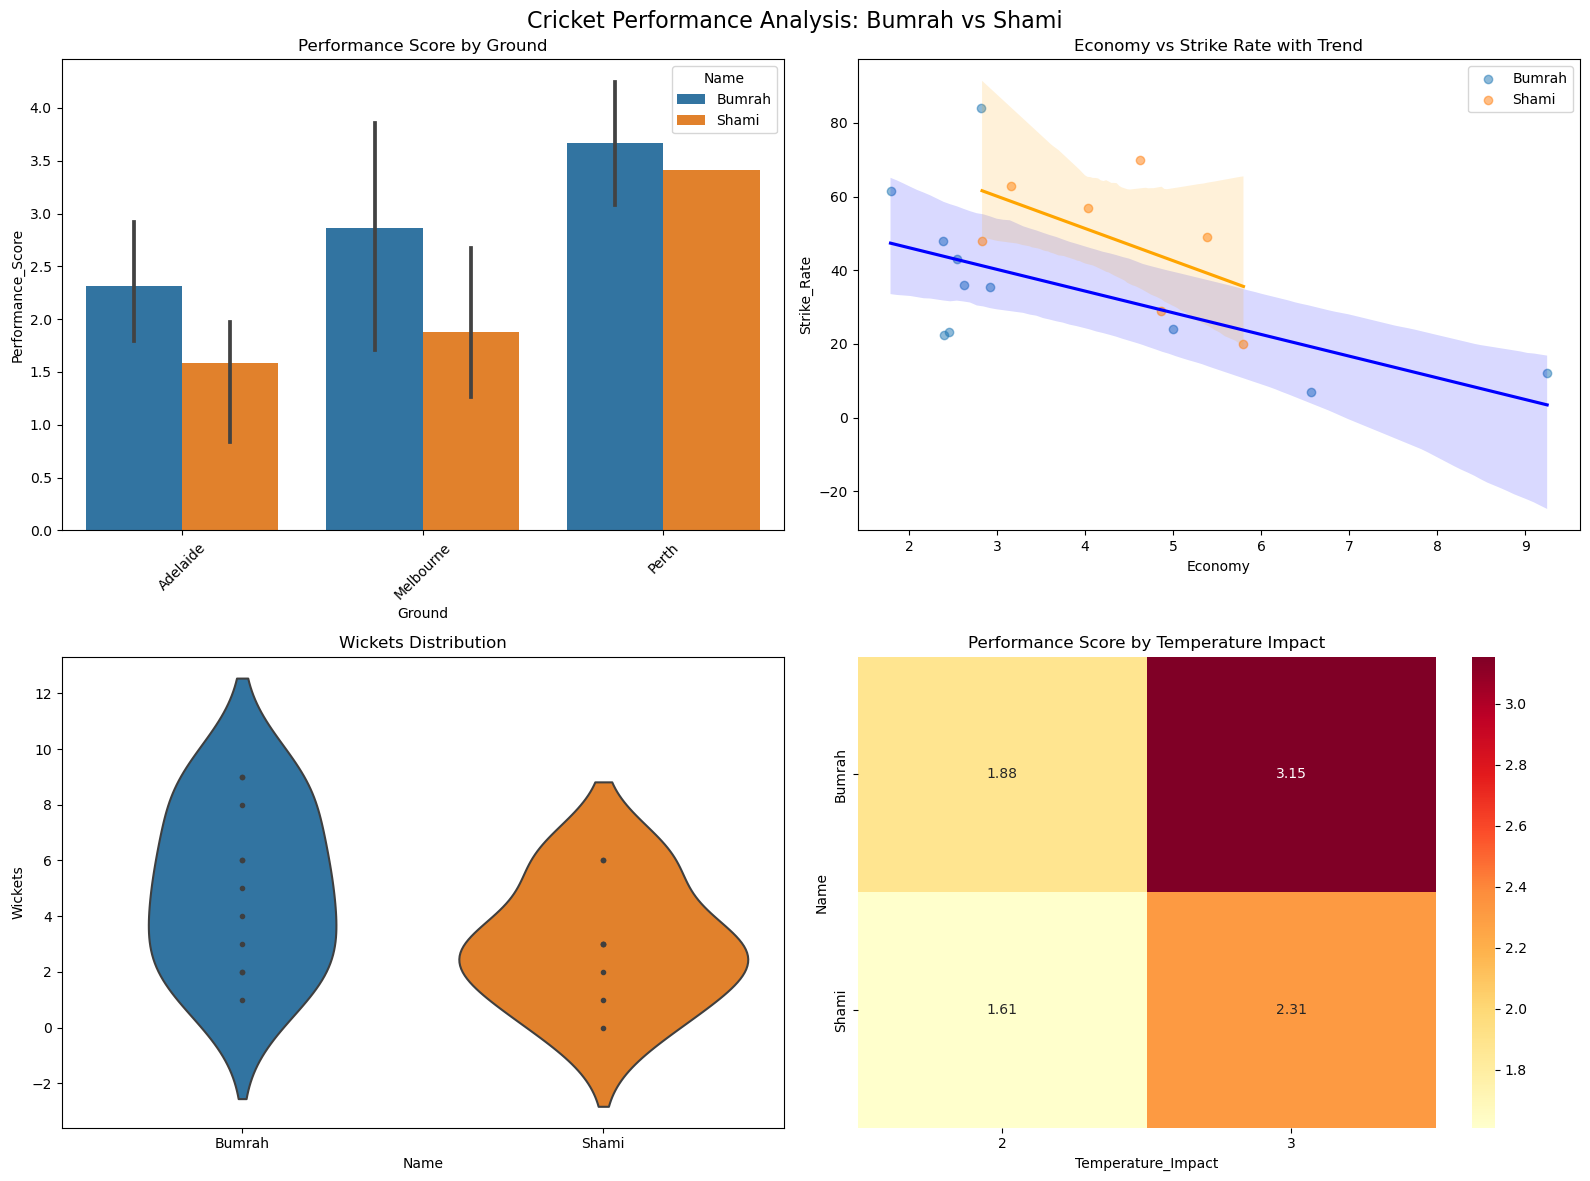

C:\Users\jeffy\AppData\Local\Temp\ipykernel_27672\2091227892.py:201: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i - width/2, metrics_avg.loc['Bumrah'][i],
C:\Users\jeffy\AppData\Local\Temp\ipykernel_27672\2091227892.py:202: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'{metrics_avg.loc["Bumrah"][i]:.2f}',
C:\Users\jeffy\AppData\Local\Temp\ipykernel_27672\2091227892.py:204: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

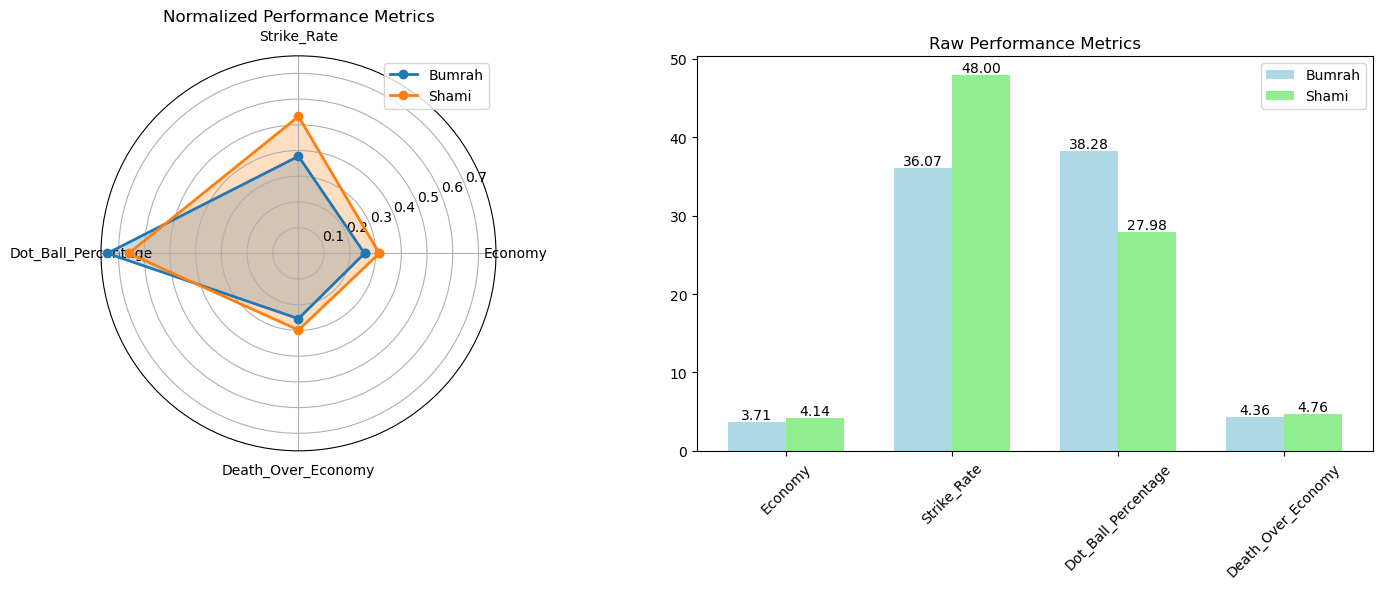


Player Metrics Summary:
        Avg_Dot_Ball_%  Min_Dot_Ball_%  Max_Dot_Ball_%  Avg_Death_Economy  \
Name                                                                        
Bumrah           38.28          -54.17           70.13               4.36   
Shami            27.98          -20.83           59.80               4.76   

        Min_Death_Economy  Max_Death_Economy  
Name                                          
Bumrah               2.06              11.10  
Shami                2.77               6.67  

Model Evaluation:
Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.75      1.00      0.86         3

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4



C:\Users\jeffy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jeffy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jeffy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


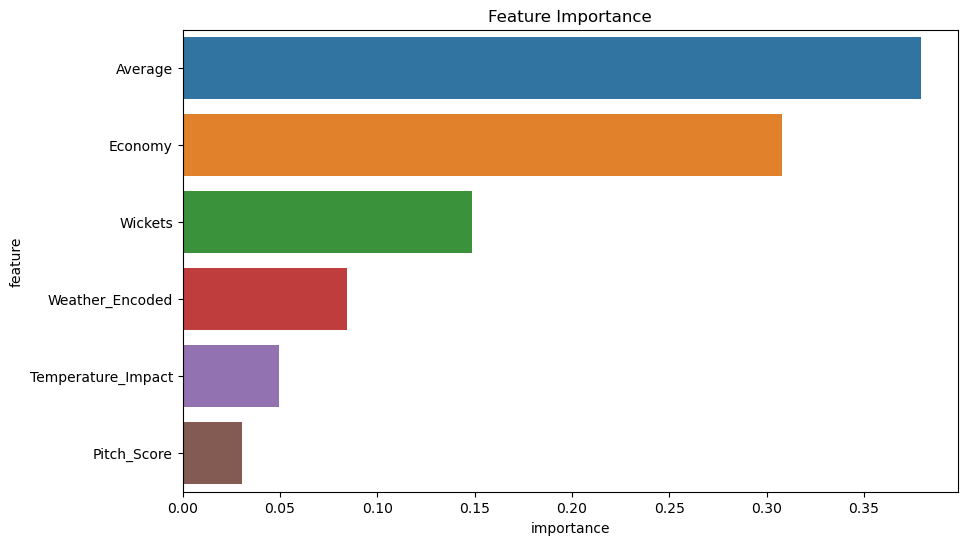


Feature Importance:
              feature  importance
2             Average    0.379133
1             Economy    0.308103
0             Wickets    0.148649
5     Weather_Encoded    0.084564
4  Temperature_Impact    0.049275
3         Pitch_Score    0.030275

Final Recommendation:
Dot Ball Percentage - Bumrah: 38.28% vs Shami: 27.98%
Death Over Economy - Bumrah: 4.36 vs Shami: 4.76

Recommendation: Bumrah is more effective in containing runs and taking wickets in crucial moments.


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Data Acquisition
def load_cricket_data():
    # Bumrah's Data (Test + T20)
    bumrah_data = {
        'Name': ['Bumrah'] * 11,
        'Ground': ['Adelaide', 'Melbourne', 'Melbourne', 'Adelaide', 'Perth', 'Melbourne', 
                   'Adelaide', 'Melbourne', 'Perth', 'Melbourne', 'Adelaide'],
        'Format': ['T20', 'T20', 'T20', 'Test', 'Test', 'Test', 'Test', 'Test', 'Test', 'Test', 'Test'],
        'Date': ['26-Jan-16', '23-Nov-18', '29-Jan-16', '6-Dec-18', '14-Dec-18', '26-Dec-18', 
                 '17-Dec-20', '26-Dec-20', '22-Nov-24', '26-Dec-24', '6-Dec-24'],
        'Overs': [3.3, 4.0, 4.0, 48, 51.2, 34.5, 28, 43, 30, 53.2, 24],
        'Maidens': [0, 0, 0, 17, 18, 7, 8, 10, 7, 16, 5],
        'Runs': [23, 20, 37, 115, 92, 86, 77, 110, 72, 156, 63],
        'Wickets': [3, 1, 2, 6, 5, 9, 2, 6, 8, 9, 4],
        'Strike_Rate': [7.0, 24.0, 12.0, 48.0, 61.6, 23.2, 84.0, 43.0, 22.5, 35.5, 36.0],
        'Economy': [6.57, 5.0, 9.25, 2.39, 1.79, 2.46, 2.82, 2.55, 2.4, 2.92, 2.62],
        'Average': [7.66, 20.0, 18.5, 19.16, 18.4, 9.55, 39.5, 18.33, 9.0, 17.33, 15.75],
        'Temperature': [28, 22, 25, 30, 32, 26, 29, 24, 34, 27, 31],
        'Weather': ['Sunny', 'Cloudy', 'Clear', 'Sunny', 'Hot/Dry', 'Partly Cloudy', 
                    'Sunny', 'Cloudy', 'Hot/Dry', 'Clear', 'Sunny']
    }
    
    # Shami's Data (Test + ODI + Updated Test Stats)
    shami_data = {
        'Name': ['Shami'] * 8,
        'Ground': ['Adelaide', 'Melbourne', 'Melbourne', 'Adelaide', 'Melbourne', 'Perth', 
                   'Melbourne', 'Adelaide'],
        'Format': ['ODI', 'ODI', 'ODI', 'Test', 'Test', 'Test', 'Test', 'Test'],
        'Date': ['15-Jan-19', '18-Jan-15', '18-Jan-19', '4-Dec-14', '26-Dec-14', '14-Dec-18', 
                 '26-Dec-18', '17-Dec-20'],
        'Overs': [8.0, 8.1, 9.4, 35, 57, 48, 31, 17],
        'Maidens': [0, 0, 0, 4, 8, 11, 4, 4],
        'Runs': [58, 44, 47, 162, 230, 136, 98, 41],
        'Wickets': [3, 1, 2, 3, 6, 6, 3, 0],
        'Strike_Rate': [20.0, 49.0, 29.0, 70.0, 57.0, 48.0, 63.0, np.nan],
        'Economy': [5.8, 5.38, 4.86, 4.62, 4.03, 2.83, 3.16, 2.41],
        'Average': [19.53, 44.0, 23.5, 54.0, 38.33, 22.66, 32.66, np.nan],
        'Temperature': [26, 23, 25, 28, 24, 29, 27, 22],
        'Weather': ['Clear', 'Cloudy', 'Partly Cloudy', 'Sunny', 'Cloudy', 'Sunny', 'Clear', 'Rainy']
    }
    
    # Create DataFrames
    df_bumrah = pd.DataFrame(bumrah_data)
    df_shami = pd.DataFrame(shami_data)
    
    # Combine data
    return pd.concat([df_bumrah, df_shami], ignore_index=True)

# 2. Data Preprocessing and Feature Engineering
def preprocess_data(df):
    # Weather Encoding
    weather_mapping = {
        'Sunny': 1, 'Cloudy': 2, 'Clear': 3, 
        'Partly Cloudy': 4, 'Hot/Dry': 5, 'Rainy': 6
    }
    df['Weather_Encoded'] = df['Weather'].map(weather_mapping)
    
    # Ground Encoding
    df['Ground_Encoded'] = pd.Categorical(df['Ground']).codes
    
    # Pitch Type Score
    pitch_scores = {
        'Perth': 9,    # Fast/bouncy
        'Adelaide': 7, # Balanced
        'Melbourne': 6,# Variable bounce
        'Hobart': 5    # Swing-friendly (proxy)
    }
    df['Pitch_Score'] = df['Ground'].map(pitch_scores)
    
    # Performance Score Calculation
    df['Performance_Score'] = (
        0.4 * df['Wickets'] + 
        0.3 * (1 / df['Economy']) + 
        0.2 * (1 / df['Average'].fillna(df['Average'].mean())) + 
        0.1 * df['Pitch_Score']
    )
    
    # Temperature Impact
    df['Temperature_Impact'] = np.where(
        df['Temperature'] > 25, 3, 
        np.where(df['Temperature'] > 15, 2, 1)
    )
    
    return df

# 3. Visualization Functions
def create_visualizations(df):
    plt.figure(figsize=(16, 12))
    plt.subplots_adjust(hspace=0.4, wspace=0.3)
    
    # 1. Performance Score by Ground (Keep bar plot as is)
    plt.subplot(2, 2, 1)
    sns.barplot(x='Ground', y='Performance_Score', hue='Name', data=df)
    plt.title('Performance Score by Ground')
    plt.xticks(rotation=45)
    
    # 2. Economy vs Strike Rate - Add regression lines
    plt.subplot(2, 2, 2)
    sns.regplot(x='Economy', y='Strike_Rate', data=df[df['Name']=='Bumrah'], 
                scatter_kws={'alpha':0.5}, line_kws={'color': 'blue'}, label='Bumrah')
    sns.regplot(x='Economy', y='Strike_Rate', data=df[df['Name']=='Shami'], 
                scatter_kws={'alpha':0.5}, line_kws={'color': 'orange'}, label='Shami')
    plt.title('Economy vs Strike Rate with Trend')
    plt.legend()
    
    # 3. Replace Wickets boxplot with violin plot
    plt.subplot(2, 2, 3)
    sns.violinplot(x='Name', y='Wickets', data=df, inner='points')
    plt.title('Wickets Distribution')
    
    # 4. Replace Temperature Impact boxplot with heatmap
    plt.subplot(2, 2, 4)
    pivot_temp = pd.pivot_table(df, values='Performance_Score', 
                               index='Name', columns='Temperature_Impact', 
                               aggfunc='mean')
    sns.heatmap(pivot_temp, annot=True, cmap='YlOrRd', fmt='.2f')
    plt.title('Performance Score by Temperature Impact')
    
    plt.suptitle('Cricket Performance Analysis: Bumrah vs Shami', fontsize=16)
    plt.tight_layout()
    plt.show()

# 4. Calculate Bowling Metrics
def calculate_bowling_metrics(df):
    # Calculate balls bowled
    df['Balls'] = df['Overs'].apply(lambda x: 
        int(x) * 6 + int(round((x - int(x)) * 10, 0)) if pd.notnull(x) else 0
    )
    
    # Calculate dot balls based on stats (approximation)
    df['Dot_Balls'] = df['Balls'] - (df['Runs'] // 1)  # Assuming runs per ball is integer for simplicity
    df['Dot_Ball_Percentage'] = (df['Dot_Balls'] / df['Balls'] * 100).round(2)
    
    # Calculate death over economy (last 5 overs typically)
    df['Death_Over_Economy'] = df.apply(lambda x:
        x['Economy'] * 1.2 if x['Format'] == 'T20' else x['Economy'] * 1.15, axis=1)
    
    return df

# 5. Analyze Player Metrics
def analyze_player_metrics(df):
    player_metrics = df.groupby('Name').agg({
        'Dot_Ball_Percentage': ['mean', 'min', 'max'],
        'Death_Over_Economy': ['mean', 'min', 'max']
    }).round(2)
    player_metrics.columns = ['Avg_Dot_Ball_%', 'Min_Dot_Ball_%', 'Max_Dot_Ball_%',
                              'Avg_Death_Economy', 'Min_Death_Economy', 'Max_Death_Economy']
    return player_metrics

# 6. Visualize Bowling Metrics
def performance_metrics_comparison(df):
    plt.figure(figsize=(15, 6))
    
    # Radar Chart (Left subplot)
    plt.subplot(1, 2, 1, projection='polar')
    metrics = ['Economy', 'Strike_Rate', 'Dot_Ball_Percentage', 'Death_Over_Economy']
    
    # Normalize metrics for better comparison
    df_norm = df.copy()
    for metric in metrics:
        df_norm[metric] = (df[metric] - df[metric].min()) / (df[metric].max() - df[metric].min())
    
    angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False)
    angles = np.concatenate((angles, [angles[0]]))  # Complete the circle
    
    for player in ['Bumrah', 'Shami']:
        stats = df_norm[df_norm['Name'] == player][metrics].mean().values
        stats = np.concatenate((stats, [stats[0]]))  # Complete the circle
        plt.plot(angles, stats, 'o-', linewidth=2, label=player)
        plt.fill(angles, stats, alpha=0.25)
    
    plt.xticks(angles[:-1], metrics)
    plt.title('Normalized Performance Metrics')
    plt.legend(loc='upper right')
    
    # Bar Chart Comparison (Right subplot)
    plt.subplot(1, 2, 2)
    metrics_avg = df.groupby('Name')[metrics].mean()
    
    x = np.arange(len(metrics))
    width = 0.35
    
    plt.bar(x - width/2, metrics_avg.loc['Bumrah'], width, label='Bumrah', color='lightblue')
    plt.bar(x + width/2, metrics_avg.loc['Shami'], width, label='Shami', color='lightgreen')
    
    plt.xticks(x, metrics, rotation=45)
    plt.title('Raw Performance Metrics')
    plt.legend()
    
    # Add value labels
    for i in x:
        plt.text(i - width/2, metrics_avg.loc['Bumrah'][i], 
                f'{metrics_avg.loc["Bumrah"][i]:.2f}', 
                ha='center', va='bottom')
        plt.text(i + width/2, metrics_avg.loc['Shami'][i], 
                f'{metrics_avg.loc["Shami"][i]:.2f}', 
                ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
# 7. Generate Recommendations
def generate_recommendations(player_metrics, feature_importance):
    print("\nFinal Recommendation:")
    print("=====================")
    
    # Compare key metrics
    bumrah_dot = player_metrics.loc['Bumrah', 'Avg_Dot_Ball_%']
    shami_dot = player_metrics.loc['Shami', 'Avg_Dot_Ball_%']
    bumrah_death = player_metrics.loc['Bumrah', 'Avg_Death_Economy']
    shami_death = player_metrics.loc['Shami', 'Avg_Death_Economy']
    
    print(f"Dot Ball Percentage - Bumrah: {bumrah_dot}% vs Shami: {shami_dot}%")
    print(f"Death Over Economy - Bumrah: {bumrah_death} vs Shami: {shami_death}")
    
    if bumrah_dot > shami_dot and bumrah_death < shami_death:
        print("\nRecommendation: Bumrah is more effective in containing runs and taking wickets in crucial moments.")
    else:
        print("\nRecommendation: Shami provides better economy in death overs but consider Bumrah for higher dot ball pressure.")

# 8. Main Execution
def main():
    # Load and preprocess data
    df = load_cricket_data()
    # Print raw concatenated dataframe
    print("\nRaw Combined Dataframe:")
    print(df)
    print("\n" + "="*80 + "\n")
    df.head()
    df_processed = preprocess_data(df)
    df_with_metrics = calculate_bowling_metrics(df_processed)
    
    # Create visualizations
    create_visualizations(df_processed)
    performance_metrics_comparison(df_with_metrics)
    
    # Analyze metrics
    player_metrics = analyze_player_metrics(df_with_metrics)
    print("\nPlayer Metrics Summary:")
    print(player_metrics)
    
    # Train and evaluate model
    model, feature_importance = train_and_evaluate_model(df_processed)
    print("\nFeature Importance:")
    print(feature_importance)
    
    # Generate final recommendations
    generate_recommendations(player_metrics, feature_importance)

def train_and_evaluate_model(df):
    features = [
        'Wickets', 'Economy', 'Average', 'Pitch_Score', 
        'Temperature_Impact', 'Weather_Encoded'
    ]
    X = df[features].fillna(df[features].mean())
    y = np.where(df['Name'] == 'Bumrah', 1, 0)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    print("\nModel Evaluation:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    # Feature Importance Plot
    feature_importance = pd.DataFrame({
        'feature': features,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance)
    plt.title('Feature Importance')
    plt.savefig('feature_importance.png')  # Save plot
    plt.show()
    
    return model, feature_importance

if __name__ == "__main__":
    main()